#### DSC550-T301 
#### Chitramoy Mukherjee
####  Final Project Milestone-1
#### Analyze Mental health disorder in Tech Companies
#### Date: 1/14/2023

Introduction:
---------------

In recent years, the tech industry has experienced rapid growth and innovation, bringing about numerous opportunities and challenges. While technological advancements have transformed the way we work, they have also introduced new stressors that can impact the mental health of individuals working in this sector. Recognizing the importance of mental health in the workplace, this project aims to analyze mental health disorders within tech companies using Python.Mental health affects your emotional, psychological and social well-being.Mental health is a key factor todetermine the productivity of the employee in any industry and as a whole total performance of the company. If someone is not mentally fit, he can’t produce the expected output what he is capable of and it also impacts his co-workers performance and impacts the work environment.

Objective:
-------------

The primary objective of this project is to gain insights into the prevalence of mental health disorders among employees in the tech industry. By leveraging Python for data analysis, we aim to explore patterns, trends, and potential factors contributing to mental health issues. The analysis will be based on a dataset collected from surveys conducted within tech companies, covering a range of variables related to mental health. This sort of analysis helps the employer to identify and support an individual who may be experiencing a mental health or substance use concern or crisis and connect them with the appropriate employee resources.
This allows employer to recognize the signs of someone who maybe struggling and teaches them the skills to know when to reach out and what resources are available.Organizations that incorporate mental health awareness help to create a healthy and
productive work environment that reduces the stigma associated with mental illness, increases the organizations mental health literacy and teaches the skills to safely and responsibly respond to a co-workers mental health concern.

Key Components:
------------------

1. **Data Collection:**
   - Gather a comprehensive dataset from tech companies, including information on employee demographics, work-related factors, and self-reported mental health conditions.

2. **Data understanding and Preprocessing:**
   - Clean and preprocess the dataset to handle missing values, outliers, and ensure data quality. Transform categorical variables and standardize formats for analysis.

3. **Exploratory Data Analysis (EDA):**
   - Utilize Python libraries such as Pandas, Matplotlib, and Seaborn to conduct exploratory data analysis. Visualize distributions, correlations, and trends in mental health-related variables.

4. **Statistical Analysis:**
   - Apply statistical methods to identify significant factors influencing mental health disorders. Conduct hypothesis testing and regression analysis to establish relationships.

5. **Machine Learning Modeling:**
   - Develop machine learning models to predict the likelihood of mental health disorders based on relevant features. Evaluate model performance and interpret results.

6. **Recommendations and Insights:**
   - Provide actionable insights and recommendations for tech companies to improve mental health support for their employees.
   
Key benefits from the outcome of the project:
---------------------------------------------------------
By the end of this project, we aim to contribute valuable insights that can inform both employers and employees about mental health in the tech industry. This analysis can serve as a foundation for fostering a healthier and more supportive work environment both from employee and employer perspective. Employers can also offer robust benefit packages to support employees who go through mental health issues. That includes Employee Assistance Programs, Wellness programs that focus on mental and physical health, Health and Disability Insurance or flexible working schedules or time off policies.

Below are the key benefits of this analysis from Employer and Employee perspective :

1. Employee Well-being and Productivity.
2. Reduced Healthcare Costs.
3. Enhanced Employee Morale.
4. Legal Compliance and Corporate Responsibility.
5. Customized Support Programs.
6. Employee Engagement and Satisfaction Surveys.
7. Workplace Culture Improvement.

This topic is relevant to data science as we can analyze and identify the factors/variables that impacts the
mental health and justify the relations between variables which is closely related to determine the mental
health of employees.We can create a model and feed data into it to identify the employees mental health in
the company and provide directions to them to overcome the situation.

In [7]:
import warnings 
warnings.filterwarnings('ignore')

# Required python basic libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import download
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score




from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

### Reading the labeledTrainData.tsv file into DataFrame
df = pd.read_csv("C:\\Users\\14024\\OneDrive\\Desktop\\MS-DSC\\DSC-550\Week-6\\survey.csv")

# Display the first few rows of the DataFrame to ensure it's loaded properly
print(df)

df.columns

                Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment work_interfere    no_employees  .

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

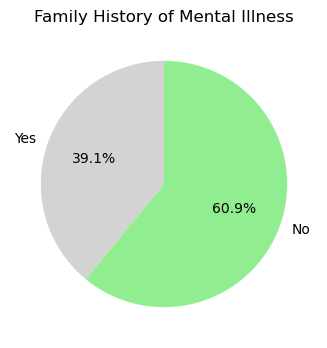

In [8]:
# Pie diagram of Family History of Mental illness
yes = len(df[df['family_history'] == 'Yes'])
no = len(df[df['family_history'] == 'No'])

count = [yes, no]
labels = ['Yes', 'No']
colors = ['lightgrey', 'lightgreen']

# Customizing the pie chart
plt.figure(figsize=(8,4))
explode = (0, 1, 1)  # Only the second slice will explode
pc = plt.pie(count, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Family History of Mental Illness');

From this, we can see that almost 40% of respondents have a family history of mental illness. According to a 2017 study by the Arctic University of Norway, it was discovered that children with parents who had a severe mental illness had up to a 50% chance of developing a mental illness, and a 32% chance of developing a severe mental illness (bipolar disorder, major depressive disorder, schizophrenia, etc). We will look further into this when performing bivariate analysis.

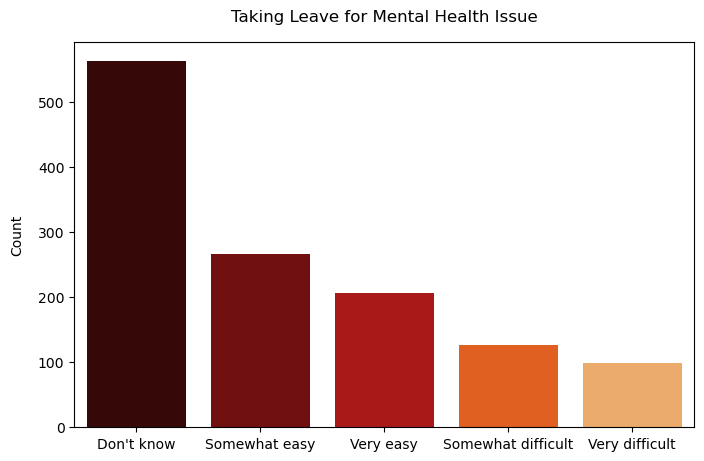

In [9]:
# Bar diagram plot of how ease to take leave due to mental health issue

df['leave'].value_counts().index
plt.figure(figsize=(8,5)) # Size of the figure

# Using value_counts(), we get the count of each answer in descending order, we then use .index to get an Index object, which
# we later pass into the order parameter of the countplot, sorting the plot in descending order
order = df['leave'].value_counts().index 

plt.title('Taking Leave for Mental Health Issue', pad=15);
mp = sns.countplot(x='leave', data=df, order=order, palette='gist_heat')
plt.ylabel('Count', labelpad=10)
mp.set(xlabel=None);

From the above plot, we can see that most respondents do not know whether they are even allowed to take leave for a mental health issue, and there are also quite a number who find it hard to do so, which may be due to the social stigma surrounding mental issues.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


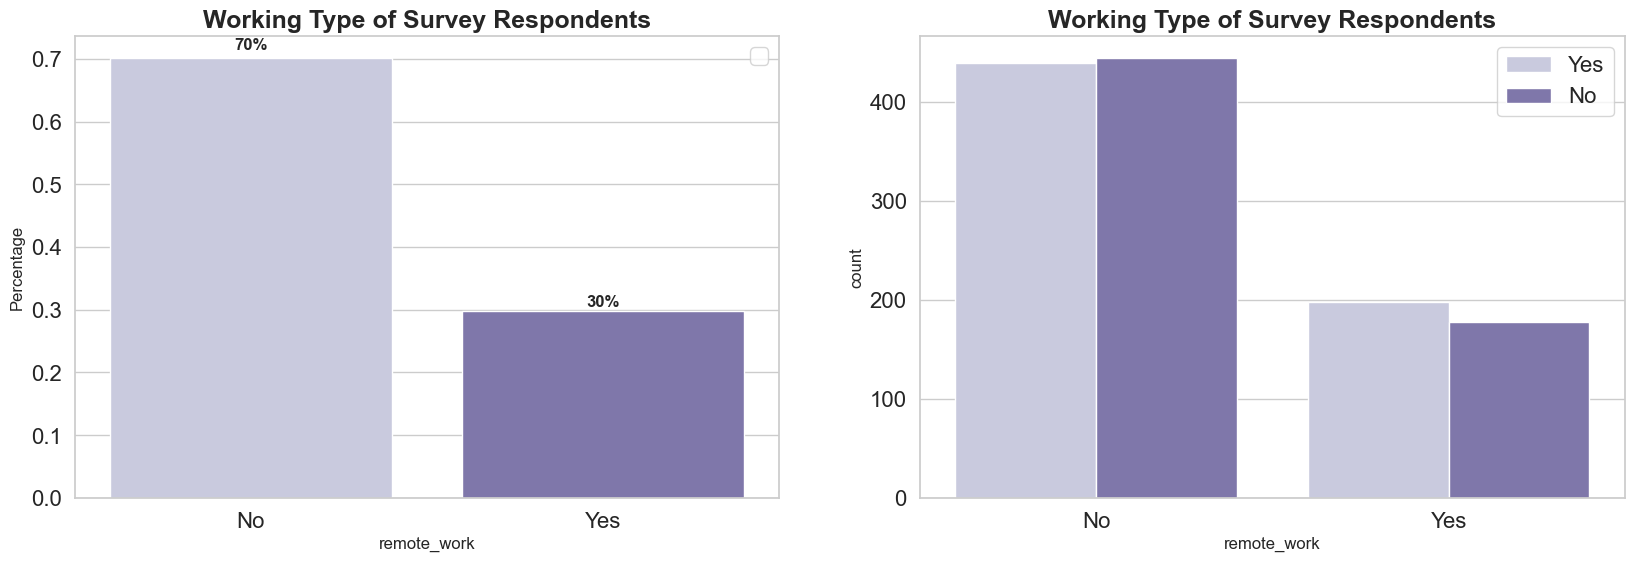

In [14]:
# Bar diagram plot of Working Type of Survey respondents
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['remote_work'].value_counts(normalize = True).rename_axis('remote_work').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'remote_work', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Working Type of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x=df['remote_work'], data = eda_percentage,  hue = df['treatment'], palette='Purples')
plt.title('Working Type of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

Around 70% of respondents don't work remotely, which means the biggest factor of mental health disorder came up triggered on the workplace. On the other side, it has slightly different between an employee that want to get treatment and don't want to get a treatment. The number of people who seek treatment in both the categories is more or less similar and it does not affect our target variable.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


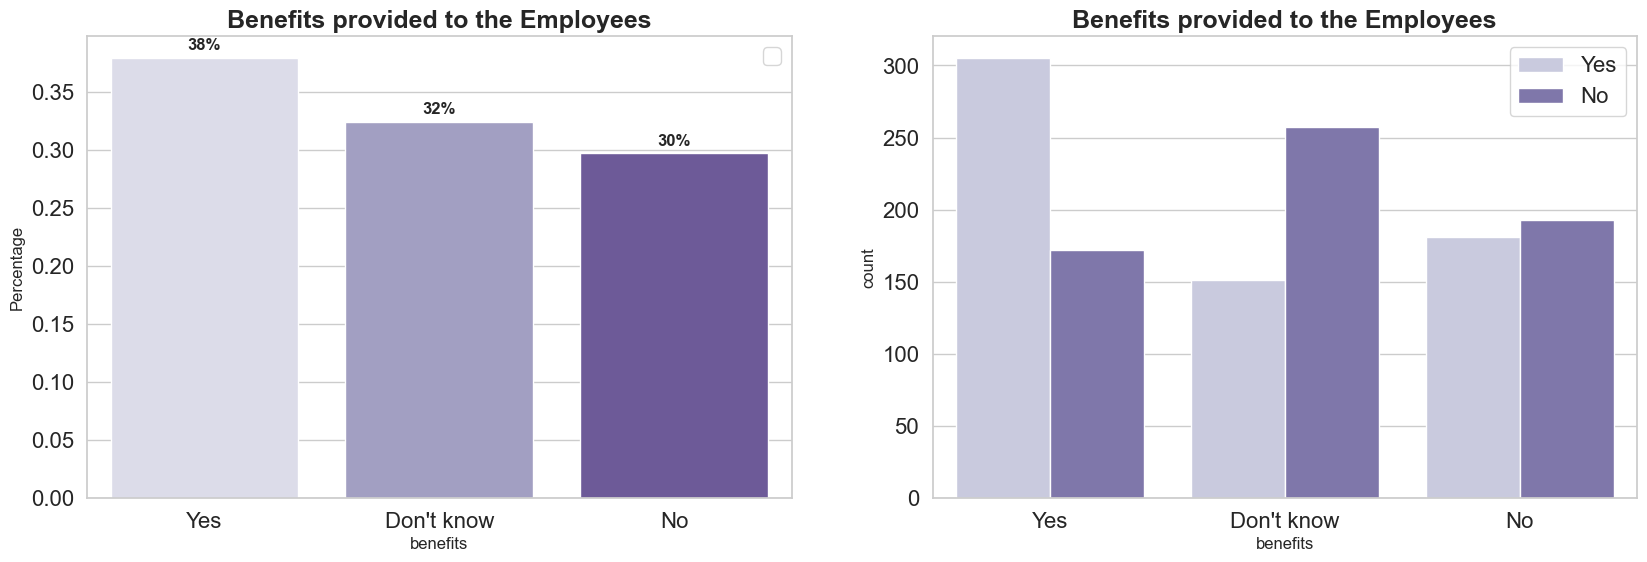

In [15]:
# Bar plot of benefits provided to the employees
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'benefits', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x=df['benefits'], data = eda_percentage,  hue = df['treatment'], palette='Purples')
plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

We see that around 38% of the respondents said that their employer provided them mental health benefits, whereas a significant number ( 32% ) of them didn't even know whether they were provided this benefit. Coming to the second graph, we see that for the people who YES said to mental health benefits, around 63% of them said that they were seeking medical help. Surprisingly, the people who said NO for the mental health benefits provided by the company, close to 45% of them who want to seek mental health treatment.